In [2]:
import re
train_loss = []
val = []
hella_score = []
hella_step = []
train_loss_pat = re.compile(r'.*- (\d*) loss: (\d*.\d*)')
val_loss_pat = re.compile(r'.*validation loss: (\d*.\d*)')
hella_pat = re.compile(r'.*- HellaSwag step (\d*). Result = \d*\/\d*=(\d.\d*)')
with open('/home/marcel/karparthy/logs/2025-03-07_13:54:04_gpt_run.log') as f:
	for line in f:
		train_match = re.match(train_loss_pat, line)
		val_match = re.match(val_loss_pat, line)
		hella_match = re.match(hella_pat, line)
		if train_match:
			train_loss.append(float(train_match.group(2)))
		elif val_match:
			val.append(float(val_match.group(1)))
		elif hella_match:
			hella_step.append(int(hella_match.group(1)))
			hella_score.append(float(hella_match.group(2)))
		else:
			continue
		

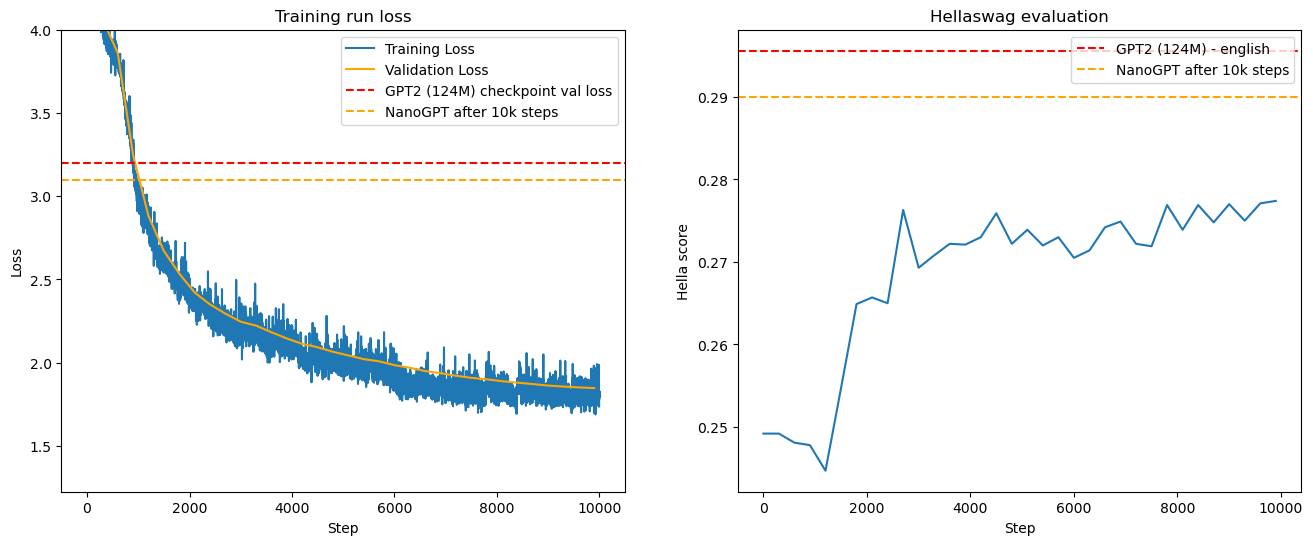

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16, 6))

ax[0].plot(range(0, 10000), train_loss, label='Training Loss', color='#1f77b4')
ax[0].plot(range(0,10000, 300), val, label='Validation Loss', color='orange')
ax[0].set_ylim(top=4)
ax[0].axhline(y=3.2, color='red', linestyle='--', label='GPT2 (124M) checkpoint val loss')
ax[0].axhline(y=3.1, color='orange', linestyle='--', label='NanoGPT after 10k steps')
ax[0].set_title('Training run loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Step')
ax[0].legend(loc='upper right')
ax[1].plot(range(0,10000, 300), hella_score)
ax[1].axhline(y=0.2956, color='red', linestyle='--', label='GPT2 (124M) - english')
ax[1].axhline(y=0.29, color='orange', linestyle='--', label='NanoGPT after 10k steps')
ax[1].set_title('Hellaswag evaluation')
ax[1].set_ylabel('Hella score')
ax[1].set_xlabel('Step')
ax[1].legend(loc='upper right')
plt.show()